<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from abc import abstractmethod
import os
import numpy as np

from datetime import datetime

from keras.models import load_model

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2grey
import matplotlib.pyplot as plt
IMG_ROWS, IMG_COLS = 65, 65

Using TensorFlow backend.


In [2]:
model = load_model('../taiko/image/drum_img_model.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


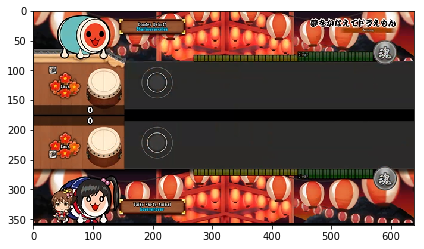

0224-1536997110.7192.png
1/1 [==============================] - 0s


1/1 [==============================] - 0s


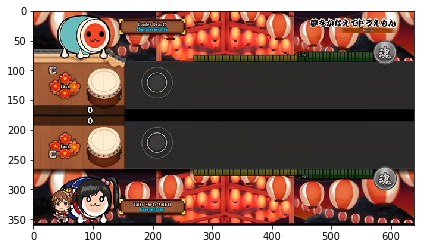

0199-1536997392.5129.png
1/1 [==============================] - 0s


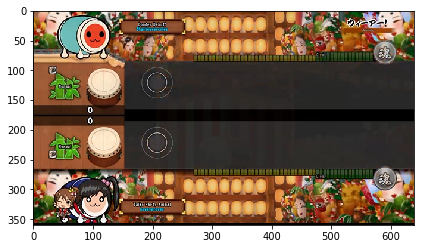

0167-1536997585.1648.png


In [7]:
dirs = next(os.walk('../bb2_capture_output'))[1]
dirs.sort()

tt = []
for dir_id, dir_ in enumerate(dirs[:4]):
    img_dir = '../bb2_capture_output/' + dir_
    files = next(os.walk(img_dir))[2]
    files.sort()
    
    count = 0
    for file_id, file in enumerate(files[:300]):
        img = imread(img_dir + '/' + file)
        img = img[95:160, 85:150]
        img = rgb2grey(img)
        x_train = [img]
        x_train = np.asarray(x_train)
        x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
        x = model.predict_classes(x_train, verbose=1)[0]
        if x == 1:
            pp = imread(img_dir + '/' + file)
            imshow(pp)
            plt.show()
            print(file)
            cap = float(file[5:-4])
            start = float(files[0][5:-4])
            tt += [(dir_, cap)]
            break

In [ ]:
tt